<a href="https://colab.research.google.com/github/IvanDaniarAP/MLTask/blob/main/week-8/SVR_on_Salary_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing dataset
ds = pd.read_csv('/content/Position_Salaries.csv')
ds.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
#since position column and level column are one of the same thing we'll take only level column as our independent variable
x = ds.iloc[:,1:-1].values
y = ds.iloc[:,-1].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
#applying feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1,1))
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [5]:
#training the model
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x,y.flatten())

SVR()

ValueError: ignored

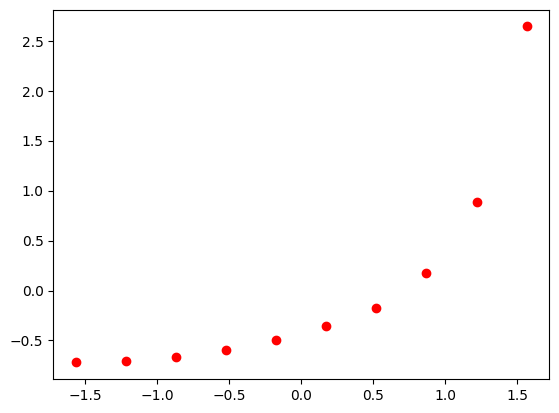

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Membuat objek StandardScaler untuk penskalaan fitur
sc_x = StandardScaler()
sc_y = StandardScaler()

# Mengubah data x dan y ke dalam bentuk array numpy (asumsi x dan y adalah array atau DataFrame)
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# Melakukan penskalaan fitur pada data x dan y
x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y)

# Membuat objek SVR (Support Vector Regression)
svr = SVR(kernel='rbf')  # Anda dapat memilih kernel yang sesuai dengan data Anda

# Melatih model SVR menggunakan data yang telah diubah skala
svr.fit(x_scaled, y_scaled.ravel())

# Membuat plot scatter dari data asli (sebelum penskalaan)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), c='red', label='Data Asli')

# Membuat array x untuk prediksi dengan interval yang lebih halus
x_for_pred = np.arange(min(x), max(x), 0.01).reshape(-1, 1)

# Melakukan penskalaan fitur pada data yang akan diprediksi
x_for_pred_scaled = sc_x.transform(x_for_pred)

# Membuat plot garis regresi dari model SVR (setelah penskalaan)
plt.plot(sc_x.inverse_transform(x_for_pred), sc_y.inverse_transform(svr.predict(x_for_pred_scaled)), label='SVR Regression', linewidth=2)

# Menambahkan label sumbu x dan y
plt.xlabel('X Label')
plt.ylabel('Y Label')

# Menambahkan judul plot
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [10]:
from sklearn.metrics import r2_score

# Menggunakan fungsi r2_score dari scikit-learn untuk mengukur keakuratan model
# r2_score mengukur seberapa baik model sesuai dengan data yang diberikan
# Lebih tinggi nilai R-squared menunjukkan bahwa model lebih baik sesuai dengan data
# Membandingkan nilai aktual (y) dengan nilai yang diprediksi oleh model SVR (svr.predict(x))
r2_value = r2_score(y, svr.predict(x))

# Menampilkan nilai R-squared sebagai ukuran kualitas model
print(f'R-squared Score: {r2_value}')

# Poin tambahan: Nilai R-squared berkisar antara 0 dan 1.
# Nilai mendekati 1 menunjukkan bahwa model dengan baik memahami variasi dalam data.
# Nilai mendekati 0 menunjukkan bahwa model kurang sesuai dengan data.


R-squared Score: 0.7513836788854974
